Use Standardization for algos which involve distance calculation
- K-Means
- K-Nearest-Neighbours
- PCA
- Artificial Neural Network
- Gradient Descent

Formula = (z-mew)/sigma where mew is mean and sigma is std dev

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('Social_Network_Ads.csv')
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
93,15699284,Female,29,28000,0


In [14]:
df=df.iloc[:,2:5]
df.sample()

,Age,EstimatedSalary,Purchased
55,24,55000,0


## Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [20]:
#X_train_scaled --> numpy array
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled.sample(5)

,Age,EstimatedSalary
165,0.503504,1.827477
166,-1.359252,-1.093347
107,0.111345,-0.312532
175,-0.672973,-0.341451
121,0.209385,-0.312532


In [23]:
X_train.describe()
#np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [25]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


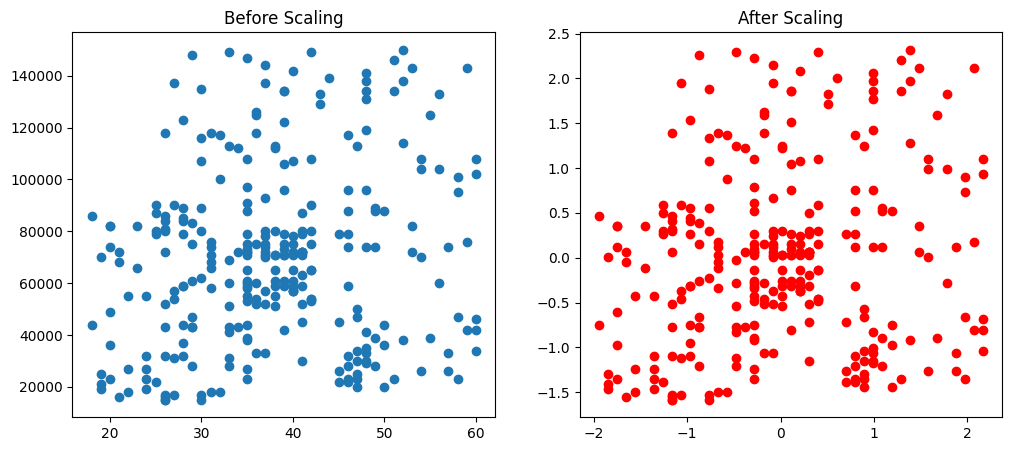

In [28]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

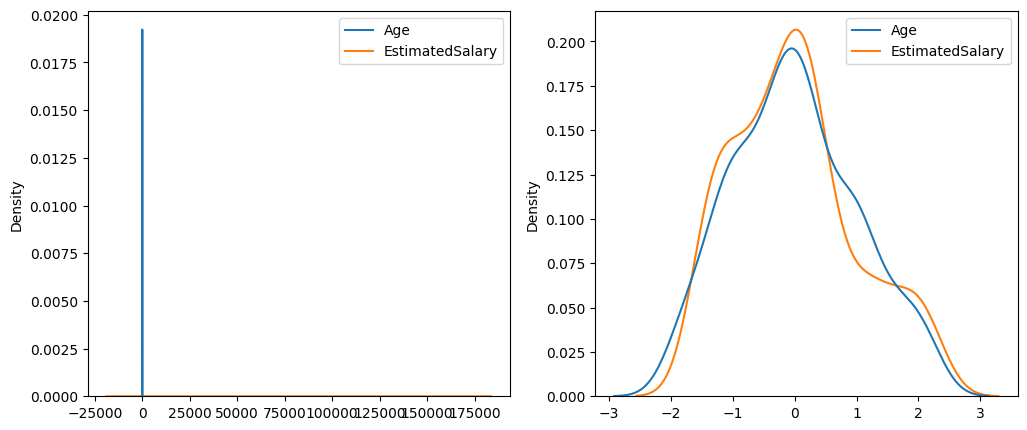

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train,ax=ax1)
sns.kdeplot(X_train_scaled,ax=ax2)
plt.show()

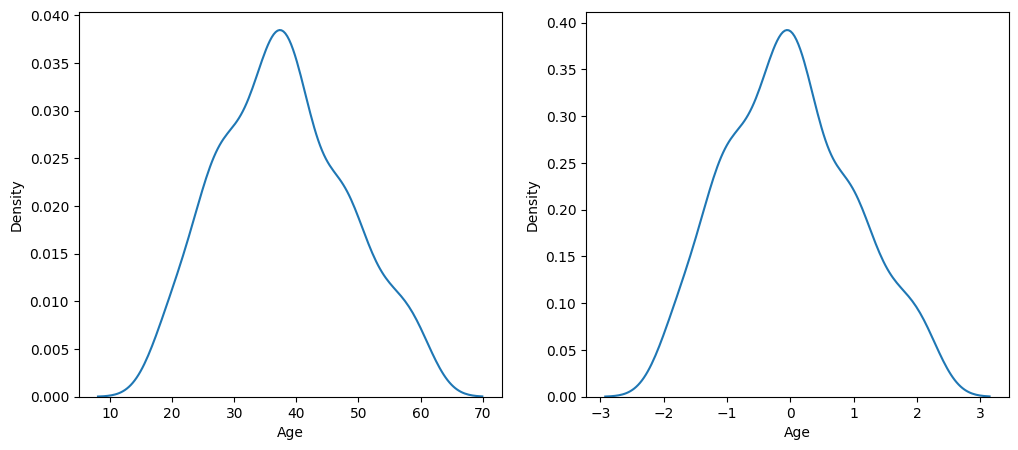

In [34]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

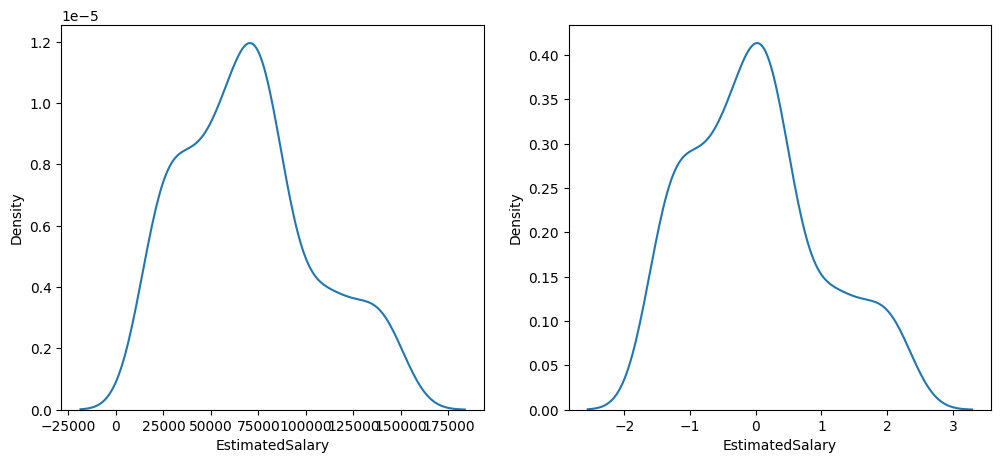

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Impact of scaling on logistic reg

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [39]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
